In [1]:
from utils.preprocessing import Preprocessor
from utils.utils import create_split
import xgboost as xgb
import pandas as pd
from Validation.Validation import doFullValidation
import os

In [2]:
# Load and split data

# TODO: automatically create or load depending if pkl format exists
# Add output pickle file to data folder

def getPickleFile(directory_path):
    files = os.listdir(directory_path)
    for file in files:
        if file.endswith(".pkl"):
            return file
    return False


path = "data/SamplesV2/CloseByPion/histo"
file = getPickleFile(path)
file = "NtupleMaxTrackster.pkl"
if os.path.isfile(os.path.join(path,file)):
    print("%s exists. Load File"%file)
    d = Preprocessor.loadNtuple(os.path.join(path,file))
else:
    print("%s doesn't exist. Create File"%file)
    preprocessor = Preprocessor(path)
    preprocessor.saveToPickle(os.path.join(path,file))
    d = Preprocessor.loadNtuple(os.path.join(path,file))
X_train, y_train, X_test, y_test = create_split(d)


NtupleMaxTrackster.pkl doesn't exist. Create File


In [3]:
X_train

,tkx_energy,tkx_numtkx,weighted_bar_x,weighted_bar_y,weighted_bar_z,cee_120,cee_200,cee_300,ceh_120,ceh_200,ceh_300,ceh_scint
4921,71.208893,1,7.477649,-82.186943,359.054260,0.269895,0.583318,0.0,0.000000,0.146787,0.000000,0.0
72923,141.651306,1,17.101299,-46.099079,355.568695,0.955441,0.000000,0.0,0.044559,0.000000,0.000000,0.0
74655,119.829582,6,-77.764603,17.368786,393.594360,0.000000,0.000000,0.0,0.629307,0.000000,0.370693,0.0
55364,22.253170,2,-89.374817,11.602781,405.255219,0.000000,0.000000,0.0,0.000000,0.076565,0.923435,0.0
10214,123.765083,2,110.090088,-51.688328,392.747528,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67672,224.831177,4,48.435410,-37.383217,341.626709,0.990193,0.000000,0.0,0.009807,0.000000,0.000000,0.0
35631,9.749168,1,-21.910631,51.381287,376.262817,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
33844,8.132749,1,-74.102058,-21.380798,336.552216,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
26313,115.759697,7,-9.267759,-54.750183,351.714813,0.955932,0.000000,0.0,0.044067,0.000000,0.000000,0.0


In [4]:
# Hyperparameter Search

# TODO: optional
regressor=xgb.XGBRegressor(eval_metric='rmsle')
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
#search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

#print("The best hyperparameters are ",search.best_params_)

In [5]:
# Create Model

#  TODO: store externally
settings = {"learning_rate":0.005,
           "n_estimators":1700,
           "max_depth":3,
           "eval_metric":'rmse'}

regressor=xgb.XGBRegressor(learning_rate = settings["learning_rate"],
                           n_estimators  = settings["n_estimators"],
                           max_depth     = settings["max_depth"],
                           eval_metric = settings["eval_metric"])

In [6]:
# Train
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
# Predict
predictions = regressor.predict(X_test)

In [8]:
y_test

23487     63.193829
86272    380.934296
74867    131.698334
19276    262.158203
85416    463.012817
            ...    
93373    396.074432
60072    187.471039
53254    357.221436
6167     295.322906
18088    179.474731
Name: cp_energy, Length: 18756, dtype: float64

Directory 'plots/XGBoost/v2/MaxTrackster' already exists.


/Users/markmatthewman/Projects/Patatrack15/Validation/fit.py:45: RuntimeWarning: overflow encountered in exp
  return A* np.exp(-dx*dx/f)


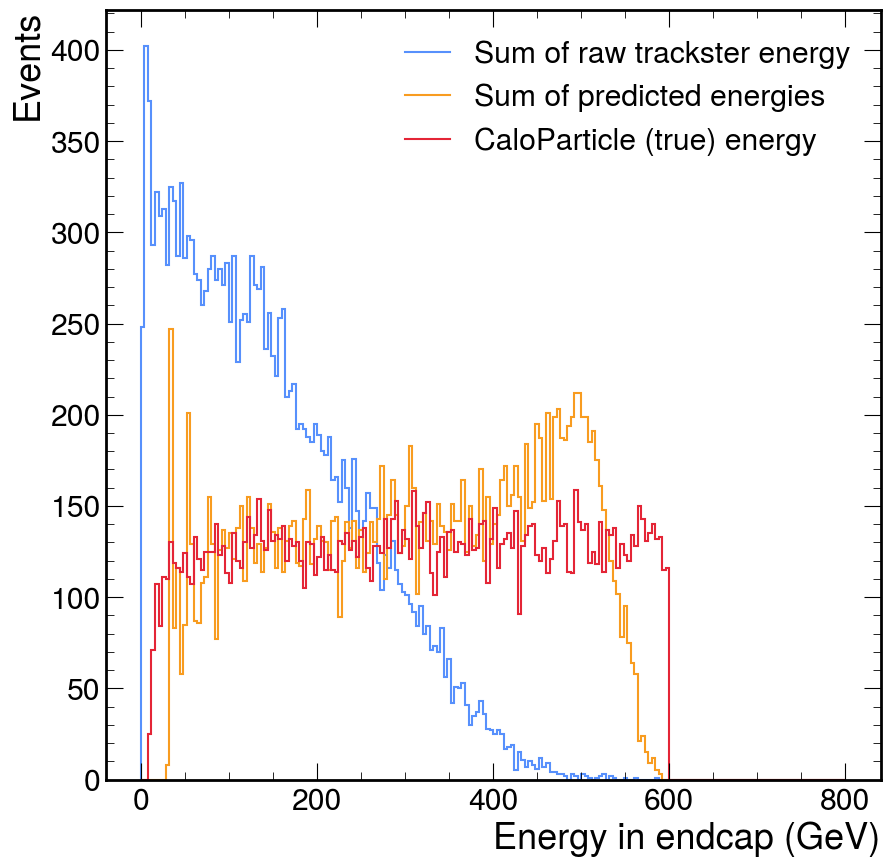

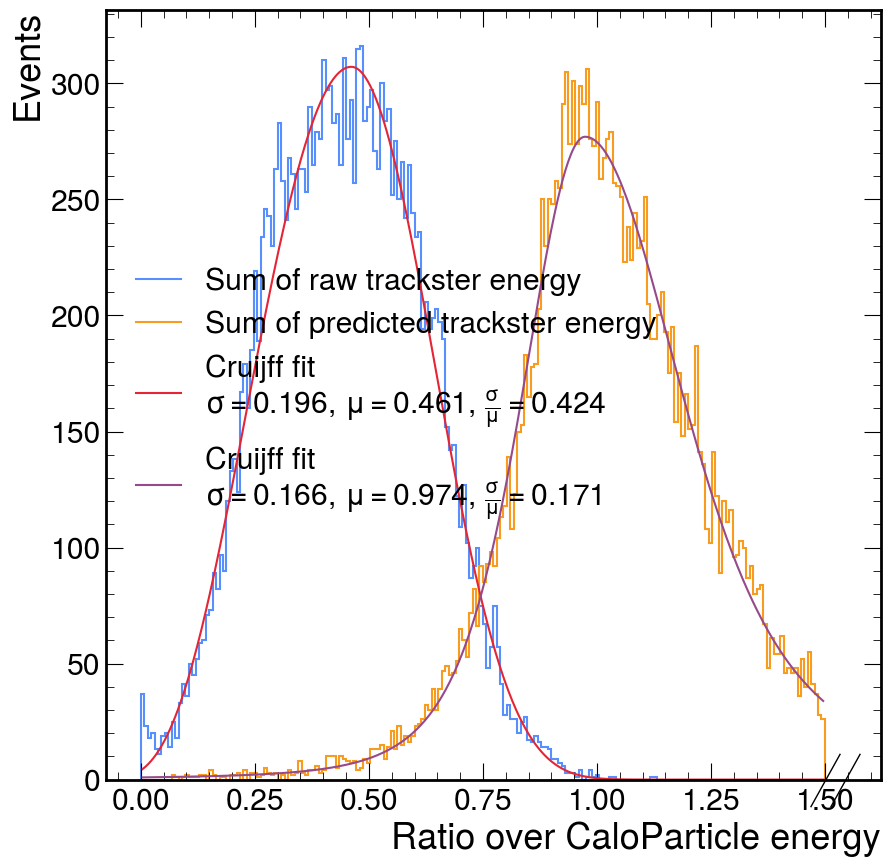

In [9]:
# Validation

#TODO: sensible output

def create_directory_if_not_exists(directory_path):
    # Check if the directory exists
    if not os.path.exists(directory_path):
        # Create the directory if it doesn't exist
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created.")
    else:
        print(f"Directory '{directory_path}' already exists.")

path="plots/XGBoost/v2/MaxTrackster"
create_directory_if_not_exists(path)
doFullValidation(X_test, y_test, predictions,path)